Please send an email to lukas.marx@uni-passau.de who will send you a csv-file including earning call transcripts for a single company. Using the pretrained Word2Vec and Doc2Vec model (https://github.com/RalfKellner/dlta_ec2vec) and code snippets from the course, conduct the following tasks.

1. Extract questions and answers from each earning call transcript
2. Convert each question and answer to a document vector
3. For each document find the five closest documents (close means highest cosine similarity) and present  1-3 documents (that seem reasonable) and its top five similar documents. Describe if you think that the documents discuss similar content.
4. Given the word list below, determine the cosine similarity between every word and document vector. Select 1-3 words with high similarity to documents and describe if you think that these documents relate to a topic which the word could represent.
5. Find the five documents which are closest to the words 'expectations' or 'expect' by using vector embeddings.

Please send your results as a ipynb-Notebook to lukas.marx@uni-passau.de no later than March 15, 2023 (2 PM/ 14 Uhr CET).

In [65]:
# esg words taken from table 3 in Baier et al. (2020): Environmental, social and governance reporting in annual reports: A textual analysis

word_list = ['clean', 'environmental', 'epa', 'sustainability', 'climate', 'warming', 'biofuels', 'biofuel',
'green', 'renewable', 'solar', 'stewardship', 'wind', 'emission', 'emissions', 'ghg', 'ghgs', 'greenhouse', 'atmosphere', 'emit',
'agriculture', 'deforestation', 'pesticide', 'pesticides', 'wetlands', 'zoning', 'biodiversity', 'species',
'wilderness', 'wildlife', 'freshwater', 'groundwater', 'water', 'air', 'carbon', 'nitrogen', 'pollution',
'superfund', 'hazardous', 'householding', 'pollutants', 'printing', 'recycling', 'toxic', 'waste', 'wastes', 'weee','recycle',
'align', 'aligned', 'aligning', 'alignment', 'aligns', 'bylaw', 'bylaws', 'charter', 'charters', 'culture', 'death', 'duly', 'parents', 'independent', 
'compliance', 'conduct', 'conformity', 'governance', 'misconduct', 'parachute', 'parachutes', 'perquisites', 'plane', 'planes', 'poison', 'retirement',
'approval', 'approvals', 'approve', 'approved',
'approves', 'approving', 'assess', 'assessed', 'assesses',
'assessing', 'assessment', 'assessments', 'audit', 'audited',
'auditing', 'auditor', 'auditors', 'audits', 'control', 'controls', 'coso',
'detect', 'detected', 'detecting', 'detection', 'evaluate',
'evaluated', 'evaluates', 'evaluating', 'evaluation', 'evaluations',
'examination', 'examinations', 'examine', 'examined',
'examines', 'examining', 'irs', 'oversee', 'overseeing', 'oversees',
'oversight', 'review', 'reviewed', 'reviewing', 'reviews', 'rotation',
'test', 'tested', 'testing', 'tests', 'treadway',
'backgrounds', 'independence', 'leadership',
'nomination', 'nominations', 'nominee', 'nominees',
'perspectives', 'qualifications', 'refreshment', 'skill', 'skills',
'succession', 'tenure', 'vacancies', 'vacancy'
'appreciation', 'award', 'awarded', 'awarding',
'awards', 'bonus', 'bonuses', 'cd', 'compensate', 'compensated',
'compensates', 'compensating', 'compensation', 'eip', 'iso', 'isos',
'payout', 'payouts', 'pension', 'prsu', 'prsus', 'recoupment',
'remuneration', 'reward', 'rewarding', 'rewards', 'rsu', 'rsus',
'salaries', 'salary', 'severance', 'vest', 'vested', 'vesting', 'vests'
'ballot', 'ballots', 'cast', 'consent', 'elect',
'elected', 'electing', 'election', 'elections', 'elects', 'nominate',
'nominated', 'plurality', 'proponent', 'proponents', 'proposal',
'proposals', 'proxies', 'quorum', 'vote', 'voted', 'votes', 'voting',
'brother', 'clicking', 'conflict', 'conflicts', 'family',
'grandchildren', 'grandparent', 'grandparents', 'inform',
'insider', 'insiders', 'inspector', 'inspectors', 'interlocks',
'nephews', 'nieces', 'posting', 'relatives', 'siblings', 'sister', 'son',
'spousal', 'spouse', 'spouses', 'stepchildren', 'stepparents',
'transparency', 'transparent', 'visit', 'visiting', 'visits', 'webpage', 'website',
'attract', 'attracting', 'attracts', 'incentive', 'incentives',
'interview', 'interviews', 'motivate', 'motivated', 'motivates',
'motivating', 'motivation', 'recruit', 'recruiting', 'recruitment',
'retain', 'retainer', 'retainers', 'retaining', 'retention', 'talent', 'talented', 'talents',
'bribery', 'corrupt', 'corruption', 'crimes', 'embezzlement',
'grassroots', 'influence', 'influences', 'influencing', 'lobbied', 'lobbies', 'lobby', 'lobbying', 'lobbyist', 'lobbyists',
'cobc', 'ethic', 'ethical', 'ethically', 'ethics', 'honesty', 'whistleblower',
'announce', 'announced', 'announcement', 'announcements', 'announces', 'announcing', 'communicate', 'communicated',
'communicates', 'communicating', 'erm', 'fairly', 'integrity', 'liaison', 'presentation', 'presentations', 'sustainable', 
'asc', 'disclose', 'disclosed', 'discloses', 'disclosing', 'disclosure', 'disclosures', 'fasb', 'gaap',
'objectivity', 'press', 'sarbanes',  'engagement', 'engagements',
'feedback', 'hotline', 'investor', 'invite', 'invited', 'mail', 'mailed',
'mailing', 'mailings', 'notice', 'relations', 'stakeholder', 'stakeholders',
'compact', 'ungc', 'citizen', 'citizens', 'csr', 'disabilities', 'disability', 'disabled',
'human', 'nations', 'social', 'un', 'veteran', 'veterans', 'vulnerable',
'children', 'epidemic', 'health', 'healthy', 'ill', 'illness',
'pandemic', 'childbirth', 'drug', 'medicaid', 'medicare', 'medicine','medicines', 'hiv',
'alcohol', 'drinking', 'bugs', 'conformance', 'defects', 'fda',
'inspection', 'inspections', 'minerals', 'standardization', 'warranty',
'dignity', 'discriminate', 'discriminated', 'discriminating', 'discrimination', 'equality', 'freedom',
'humanity', 'nondiscrimination', 'sexual', 'communities', 'community',
'expression', 'marriage', 'privacy', 'peace',
'bargaining', 'eeo', 'fairness', 'fla', 'harassment',
'injury', 'labor', 'overtime', 'ruggie', 'sick', 'wage', 'wages',
'workplace', 'bisexual', 'diversity', 'ethnic', 'ethnically', 'ethnicities',
'ethnicity', 'female', 'females', 'gay', 'gays', 'gender', 'genders',
'homosexual', 'immigration', 'lesbian', 'lesbians', 'lgbt',
'minorities', 'minority', 'ms', 'race', 'racial', 'religion', 'religious',
'sex', 'transgender', 'woman', 'women',
'occupational', 'safe', 'safely', 'safety', 'ilo', 'labour', 'eicc',
'endowment', 'endowments', 'people', 'philanthropic',
'philanthropy', 'socially', 'societal', 'society', 'welfare',
'charitable', 'charities', 'charity', 'donate', 'donated',
'donates', 'donating', 'donation', 'donations', 'donors',
'foundation', 'foundations', 'gift', 'gifts', 'nonprofit', 'poverty',
'courses', 'educate', 'educated', 'educates',
'educating', 'education', 'educational', 'learning', 'mentoring',
'scholarships', 'teach', 'teacher', 'teachers', 'teaching', 'training',
'employ', 'employment', 'headcount', 'hire', 'hired',
'hires', 'hiring', 'staffing', 'unemployment']

In [1]:
pip install --upgrade pandas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! pip install numpy==1.22.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
! pip install --upgrade gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas as pd
from google.colab import drive
import numpy as np
import pylab as pl
import matplotlib.gridspec as gridspec
from matplotlib import pyplot as plt
import seaborn as sns
drive.mount('/content/drive')
url="/content/drive/MyDrive/safina03.csv"
df_ec_mohsen = pd.read_csv(url)
df_ec_mohsen.tail()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,index,ticker,quarter,year,date,content
47,47,CCEP,2,2020,2020-08-10 17:00:00,"Operator: Good afternoon. My name is Michelle,..."
48,48,CCEP,4,2020,2021-02-12 15:58:06,"Sarah Willett: Thank you, and good afternoon, ..."
49,49,CCEP,2,2021,2021-09-02 14:07:07,Operator: Hello. And thank you for standing by...
50,50,CCEP,4,2021,2022-02-16 15:08:04,Sarah Willett: Thank you all for joining us to...
51,51,CCEP,2,2022,2022-08-06 12:14:12,Sarah Willett: Hello. Thank you all for joinin...


In [5]:
url

'/content/drive/MyDrive/safina03.csv'

In [6]:
ec_transcript = df_ec_mohsen.content.values[-1]
for par in ec_transcript.split('\n'):
  print(par)

Sarah Willett: Hello. Thank you all for joining us today. I am here with Damian Gammell, our CEO and Nik Jhangiani, our CFO. Before we begin with our opening remarks on our results for Second Quarter and Half Year 2022, a reminder of our cautionary statements. This call will contain forward-looking management comments and other statements reflecting our outlook. These comments should be considered in conjunction with the cautionary language contained in todayâs release as well as the detailed cautionary statements found in reports filed with the U.K., U.S., Dutch and Spanish authorities. A copy of this information is available on our website at www.cocacolaep.com. Prepared remarks will be made by Damian and Nik and accompanied by a slide deck. We will then turn the call over to your questions. Please note that unless otherwise stated, metrics presented today will be on a comparable and FX neutral basis throughout. Any growth rate, will also be presented on a pro forma basis. Followin

In [7]:
from gensim.utils import simple_preprocess

for par in ec_transcript.split('\n'):
  name, text = par.split(':', maxsplit = 1)
  name_p, text_p = ' '.join(simple_preprocess(name)), ' '.join(simple_preprocess(text))
  print(name_p)
  print(text_p)
  print('-'*100)

sarah willett
hello thank you all for joining us today am here with damian gammell our ceo and nik jhangiani our cfo before we begin with our opening remarks on our results for second quarter and half year reminder of our cautionary statements this call will contain forward looking management comments and other statements reflecting our outlook these comments should be considered in conjunction with the cautionary language contained in todayâ release as well as the detailed cautionary statements found in reports filed with the dutch and spanish authorities copy of this information is available on our website at www cocacolaep com prepared remarks will be made by damian and nik and accompanied by slide deck we will then turn the call over to your questions please note that unless otherwise stated metrics presented today will be on comparable and fx neutral basis throughout any growth rate will also be presented on pro forma basis following the call full transcript will be made available

In [8]:
import numpy as np

ec_docs = pd.DataFrame(columns = ['name', 'doc_tokens'])
doc_id_tmp = 0
ec_participants = {}
for par in ec_transcript.lower().split('\n'):
    name, text = par.split(':', maxsplit = 1)
    name = ' '.join(simple_preprocess(name))
    text2tokens = simple_preprocess(text)

    if (len(text2tokens) > 3) & (len(name) > 0) & (name != 'operator'):
      words_spoken = len(text2tokens)
      ec_docs = ec_docs.append({'name': name, 'doc_tokens': text2tokens}, ignore_index = True)
      doc_id_tmp += 1
      if name in ec_participants.keys():
          ec_participants[name].append(words_spoken)
      else:
          ec_participants[name] = [] 
          ec_participants[name].append(words_spoken)   
      print(f'Speaker: {name}, words spoken: {words_spoken}')

ec_summary = {
    'nbr_occurr': [],
    'max_words': [],
    'avg_words': []
}

for key in ec_participants.keys():
    ec_summary['nbr_occurr'].append(len(ec_participants[key]))
    ec_summary['max_words'].append(np.max(ec_participants[key]))
    ec_summary['avg_words'].append(np.mean(ec_participants[key]))

ec_summary = pd.DataFrame(ec_summary, index = ec_participants.keys())
ec_summary.sort_values(by = 'nbr_occurr', ascending=False, inplace=True)
ec_summary.loc[:, 'frac_occur'] = ec_summary.nbr_occurr / ec_summary.nbr_occurr.sum()


firm_people = list(ec_summary[ec_summary.frac_occur > .10].index.values)

analysts = list(ec_summary[ec_summary.frac_occur <= .10].index.values)


officials_lost = list(set(list(ec_participants.keys())[:2]).intersection(set(analysts)))
if len(officials_lost) > 0:
    for official in officials_lost:
        firm_people.append(official)
        analysts.remove(official)

Speaker: sarah willett, words spoken: 179
Speaker: damian gammell, words spoken: 1787
Speaker: nik jhangiani, words spoken: 1859
Speaker: damian gammell, words spoken: 142
Speaker: edward mundy, words spoken: 62
Speaker: damian gammell, words spoken: 449
Speaker: edward mundy, words spoken: 48
Speaker: damian gammell, words spoken: 177
Speaker: nik jhangiani, words spoken: 43
Speaker: simon hales, words spoken: 105
Speaker: nik jhangiani, words spoken: 270
Speaker: simon hales, words spoken: 89
Speaker: damian gammell, words spoken: 123
Speaker: simon hales, words spoken: 5
Speaker: brian williams, words spoken: 131
Speaker: nik jhangiani, words spoken: 140
Speaker: brian williams, words spoken: 98
Speaker: nik jhangiani, words spoken: 88
Speaker: brian williams, words spoken: 5
Speaker: charlie higgs, words spoken: 110
Speaker: damian gammell, words spoken: 474
Speaker: charlie higgs, words spoken: 43
Speaker: nik jhangiani, words spoken: 58
Speaker: charlie higgs, words spoken: 5
Spe

<ipython-input-8-cad4011068b3>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ec_docs = ec_docs.append({'name': name, 'doc_tokens': text2tokens}, ignore_index = True)
<ipython-input-8-cad4011068b3>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ec_docs = ec_docs.append({'name': name, 'doc_tokens': text2tokens}, ignore_index = True)
<ipython-input-8-cad4011068b3>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ec_docs = ec_docs.append({'name': name, 'doc_tokens': text2tokens}, ignore_index = True)
<ipython-input-8-cad4011068b3>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ec_docs = ec_docs.append({'name': name, 'doc_tokens':

In [9]:
ec_summary

,nbr_occurr,max_words,avg_words,frac_occur
damian gammell,17,1787,320.117647,0.326923
nik jhangiani,12,1859,251.250000,0.230769
simon hales,3,105,66.333333,0.057692
brian williams,3,131,78.000000,0.057692
charlie higgs,3,110,52.666667,0.057692
edward mundy,2,62,55.000000,0.038462
sanjeet aujla,2,81,63.000000,0.038462
bonnie herzog,2,83,44.000000,0.038462
lauren lieberman,2,119,65.000000,0.038462
robert ottenstein,2,80,42.000000,0.038462


In [10]:
firm_people


['damian gammell', 'nik jhangiani', 'sarah willett']

In [11]:
analysts

['simon hales',
 'brian williams',
 'charlie higgs',
 'edward mundy',
 'sanjeet aujla',
 'bonnie herzog',
 'lauren lieberman',
 'robert ottenstein',
 'eric wilmer',
 'fintan ryan']

In [12]:
ec_docs

,name,doc_tokens
0,sarah willett,"[hello, thank, you, all, for, joining, us, tod..."
1,damian gammell,"[thank, you, sarah, and, good, morning, good, ..."
2,nik jhangiani,"[thank, you, damian, and, thank, you, all, for..."
3,damian gammell,"[thank, you, nik, so, finally, to, recap, on, ..."
4,edward mundy,"[afternoon, damian, and, to, nik, sir, look, a..."
5,damian gammell,"[good, morning, ed, yes, think, we, re, very, ..."
6,edward mundy,"[okay, damian, and, just, as, quick, follow, u..."
7,damian gammell,"[yes, mean, think, you, even, look, within, sp..."
8,nik jhangiani,"[and, think, our, customer, service, levels, h..."
9,simon hales,"[thank, you, hi, damian, and, nik, sarah, nik,..."


In [13]:
fst_occurrence_of_analyst = [(name in analysts) for name in ec_docs.name.to_list()].index(True)
q_and_a_part = ec_docs.iloc[fst_occurrence_of_analyst:, :]
q_and_a_part

,name,doc_tokens
4,edward mundy,"[afternoon, damian, and, to, nik, sir, look, a..."
5,damian gammell,"[good, morning, ed, yes, think, we, re, very, ..."
6,edward mundy,"[okay, damian, and, just, as, quick, follow, u..."
7,damian gammell,"[yes, mean, think, you, even, look, within, sp..."
8,nik jhangiani,"[and, think, our, customer, service, levels, h..."
9,simon hales,"[thank, you, hi, damian, and, nik, sarah, nik,..."
10,nik jhangiani,"[hey, simon, yes, great, question, and, very, ..."
11,simon hales,"[got, it, and, then, just, follow, up, as, we,..."
12,damian gammell,"[yes, mean, honestly, that, actually, quite, s..."
13,simon hales,"[got, it, excellent, thank, you]"


In [14]:
corpus = []
doc_id_tmp = 0
global_doc_ids = []

speaker_names = []


for ec_idx, ec_transcript in enumerate(df_ec_mohsen.content):

  
  ec_docs = pd.DataFrame(columns = ['name', 'doc_tokens'])

  
  ec_participants = {}
  for par in ec_transcript.lower().split('\n'):
      name, text = par.split(':', maxsplit = 1)
      name = ' '.join(simple_preprocess(name))
      text2tokens = simple_preprocess(text)

      
      if (5 < len(text2tokens) <= 500) & (len(name) > 0) & (name != 'operator'):
        words_spoken = len(text2tokens)
        ec_docs = ec_docs.append({'name': name, 'doc_tokens': text2tokens}, ignore_index = True)

        if name in ec_participants.keys():
            ec_participants[name].append(words_spoken)
        else:
            ec_participants[name] = [] 
            ec_participants[name].append(words_spoken)   

  
  ec_summary = {
      'nbr_occurr': [],
      'max_words': [],
      'avg_words': []
  }

  for key in ec_participants.keys():
      ec_summary['nbr_occurr'].append(len(ec_participants[key]))
      ec_summary['max_words'].append(np.max(ec_participants[key]))
      ec_summary['avg_words'].append(np.mean(ec_participants[key]))

  ec_summary = pd.DataFrame(ec_summary, index = ec_participants.keys())
  ec_summary.sort_values(by = 'nbr_occurr', ascending=False, inplace=True)
  ec_summary.loc[:, 'frac_occur'] = ec_summary.nbr_occurr / ec_summary.nbr_occurr.sum()

 

 
  firm_people = list(ec_summary[ec_summary.frac_occur > .10].index.values)
 
  analysts = list(ec_summary[ec_summary.frac_occur <= .10].index.values)

 
  officials_lost = list(set(list(ec_participants.keys())[:2]).intersection(set(analysts)))
  if len(officials_lost) > 0:
      for official in officials_lost:
          firm_people.append(official)
          analysts.remove(official)

  # extract questions and answers by checking when the first time an analyst starts reading
  fst_occurrence_of_analyst = [(name in analysts) for name in ec_docs.name.to_list()].index(True)
  q_and_a_part = ec_docs.iloc[fst_occurrence_of_analyst:, :]

  # collect these questions and answers in the corpus
  for row in q_and_a_part.iterrows():
    idx, row_ = row
    corpus.append(row_['doc_tokens'])
    speaker_names.append(row_['name'])
    global_doc_ids.append(str(doc_id_tmp)+ '_' + str(idx) + '_' + df_ec_mohsen.iloc[ec_idx,:].date)
    doc_id_tmp += 1



Streaming output truncated to the last 5000 lines.
<ipython-input-14-a2db2b6bacef>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ec_docs = ec_docs.append({'name': name, 'doc_tokens': text2tokens}, ignore_index = True)
<ipython-input-14-a2db2b6bacef>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ec_docs = ec_docs.append({'name': name, 'doc_tokens': text2tokens}, ignore_index = True)
<ipython-input-14-a2db2b6bacef>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ec_docs = ec_docs.append({'name': name, 'doc_tokens': text2tokens}, ignore_index = True)
<ipython-input-14-a2db2b6bacef>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


We extracted 2757 questions and answers

The average number of words per question and answer is: 89.39571998549148
The median of words per question and answer is: 66.0
The minimum of words per question and answer is: 6
The maximum of words per question and answer is: 497



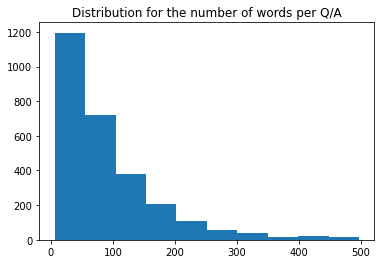

In [15]:
import matplotlib.pylab as plt

print(f'We extracted {len(corpus)} questions and answers\n')

len_qas = [len(doc) for doc in corpus]

print(f'The average number of words per question and answer is: {np.mean(len_qas)}')
print(f'The median of words per question and answer is: {np.median(len_qas)}')
print(f'The minimum of words per question and answer is: {np.min(len_qas)}')
print(f'The maximum of words per question and answer is: {np.max(len_qas)}\n')

plt.hist(len_qas)
plt.title('Distribution for the number of words per Q/A')
plt.show()

In [16]:
from gensim.parsing.preprocessing import STOPWORDS

# a list of stopwords
print(STOPWORDS)

frozenset({'see', 'thereby', 'mostly', 'over', 'made', 'one', 'ten', 'become', 'alone', 'show', 'both', 'about', 'with', 'wherein', 'i', 'former', 'after', 'besides', 'what', 'why', 'top', 'sincere', 'thus', 'thin', 'her', 'noone', 'so', 'became', 'anywhere', 'de', 'latterly', 'should', 'there', 'it', 'me', 'a', 'last', 'the', 'ie', 'take', 'couldnt', 'done', 'now', 'beside', 'fifty', 'co', 'while', 'in', 'con', 'name', 'anyway', 'whoever', 'due', 'hasnt', 'eleven', 'another', 'already', 'twelve', 'someone', 'hers', 'ever', 'meanwhile', 'namely', 'didn', 'serious', 'before', 'call', 'really', 'ltd', 'she', 'itself', 'into', 'yet', 'mine', 'interest', 'further', 'forty', 'well', 'whenever', 'other', 'inc', 'side', 'once', 'if', 'kg', 'herein', 'hereafter', 'seeming', 'almost', 'km', 'thick', 'computer', 'our', 'ours', 'somehow', 'doesn', 'can', 'when', 'everything', 'amongst', 'first', 'your', 'more', 'be', 'still', 'toward', 'of', 'from', 'same', 'fire', 'however', 'for', 'their', 'am'

In [17]:
corpus_wo_sw = [[word for word in doc if not(word in STOPWORDS)] for doc in corpus]

In [18]:
from gensim.models.phrases import Phrases, ENGLISH_CONNECTOR_WORDS

phraser = Phrases(corpus_wo_sw, min_count = 10, threshold = 10, connector_words=ENGLISH_CONNECTOR_WORDS)
corpus_w_bigrams = phraser[corpus_wo_sw]

bigram_list = []
for doc in corpus_w_bigrams:
  for word in doc:
    if '_' in word:
      bigram_list.append(word)
unique_bigrams = set(bigram_list)
unique_bigrams

{'andrew_holland',
 'ask_hubert',
 'ask_steve',
 'away_home',
 'balance_sheet',
 'basis_points',
 'bit_color',
 'boost_zone',
 'boost_zones',
 'brand_strategy',
 'broadly_speaking',
 'business_model',
 'business_transformation',
 'business_units',
 'capri_sun',
 'cash_flow',
 'coca_cola',
 'cogs_case',
 'coke_classic',
 'coke_company',
 'coke_energy',
 'coke_life',
 'coke_light',
 'coke_zero',
 'cola_company',
 'cold_drink',
 'color_commentary',
 'competitive_environment',
 'consumer_behavior',
 'consumers_customers',
 'continue_grow',
 'continue_invest',
 'cost_base',
 'cost_goods',
 'couple_questions',
 'couple_years',
 'create_value',
 'created_ccep',
 'currency_neutral',
 'customer_service',
 'damian_said',
 'day_thank',
 'diet_coke',
 'digit_range',
 'double_digit',
 'early_days',
 'end_day',
 'energy_category',
 'energy_drink',
 'energy_drinks',
 'energy_portfolio',
 'et_cetera',
 'excise_tax',
 'feel_confident',
 'flow_generation',
 'fourth_quarter',
 'free_cash',
 'future_consu

In [19]:
import pandas as pd
from collections import defaultdict

# Count word frequencies
frequency = defaultdict(int)
for doc in corpus_w_bigrams:
    for token in doc:
        frequency[token] += 1

# take a look at the most frequent words
n = 25
top_n_words = pd.Series(frequency).sort_values(ascending = False).iloc[:n]
top_n_words

think        1880
year         1198
ve            733
look          702
going         698
business      600
terms         573
obviously     565
quarter       562
growth        529
clearly       515
like          464
pricing       457
question      456
continue      455
gb            452
volume        433
lot           428
kind          422
market        421
right         420
yes           397
ll            380
markets       374
time          373
dtype: int64

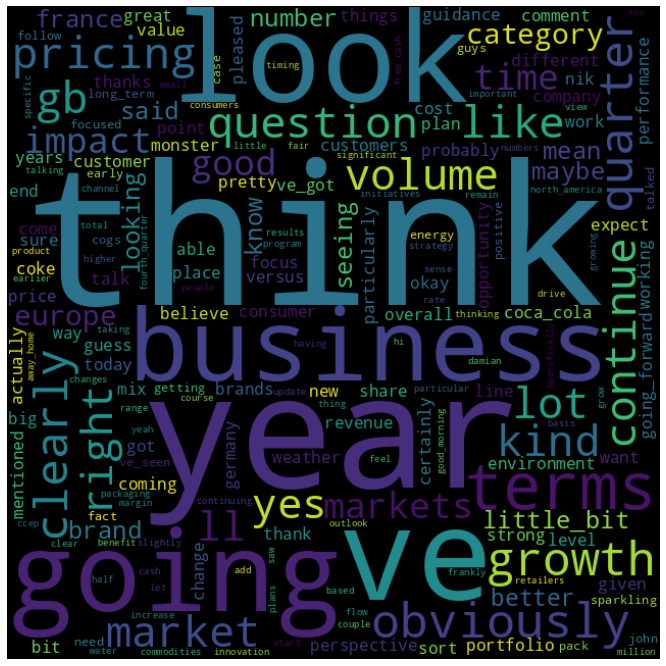

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud image
wordcloud = WordCloud(width = 640, height = 640).generate_from_frequencies(frequency)

# Display the generated image:
# the matplotlib way:
fig, ax = plt.subplots(figsize = (12, 12))
ax.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [21]:
from gensim import corpora
dct = corpora.Dictionary(corpus_w_bigrams)
len(dct.keys())
dct.filter_extremes(no_below = 3, no_above = 0.8)
len(dct.keys())

3048

In [22]:
corpus_wo_sw[0]

['good',
 'morning',
 'talk',
 'bit',
 'progress',
 'respect',
 'restructuring',
 'efforts',
 'point',
 'like',
 'maybe',
 'tracking',
 'ahead',
 'expectations',
 'wondering',
 'realizing',
 'benefits',
 'earlier',
 'initially',
 'expecting',
 'expect',
 'savings',
 'realized',
 'initially',
 'anticipated']

In [23]:
from gensim.matutils import sparse2full


bow = [dct.doc2bow(doc) for doc in corpus_w_bigrams]


np_bow = np.zeros(shape = (len(bow), len(dct.items())))

for i in range(len(bow)):
  np_bow[i, :] = sparse2full(bow[i], length = len(dct.items()))


dct[0]
columns = [dct.id2token[id] for id in dct.keys()]
doc_ids = [int(id.split('_')[0]) for id in global_doc_ids]
bow_df = pd.DataFrame(np_bow, columns = columns, index = doc_ids)
bow_df.head()

,ahead,anticipated,benefits,bit,earlier,efforts,expect,expectations,expecting,good_morning,...,peter,cider,api,mitch,indonesia,new_zealand,australian,ramadan,triggers,thatâ
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
from sklearn.metrics.pairwise import cosine_similarity


bow_similarity_matrix = cosine_similarity(bow_df.values, bow_df.values)

In [25]:
doc_id = 0

arr = bow_similarity_matrix[doc_id, :]

print(corpus[doc_id])
for idx in arr.argsort()[-6:-1][::-1]:
  print(arr[idx])
  print(corpus[idx])

['good', 'morning', 'could', 'you', 'talk', 'bit', 'more', 'about', 'your', 'progress', 'with', 'respect', 'to', 'your', 'restructuring', 'efforts', 'at', 'this', 'point', 'it', 'seems', 'like', 'maybe', 'you', 're', 'tracking', 'ahead', 'of', 'your', 'expectations', 'so', 'was', 'just', 'wondering', 'if', 'you', 're', 'realizing', 'more', 'of', 'these', 'benefits', 'earlier', 'than', 'you', 'were', 'initially', 'expecting', 'or', 'should', 'we', 'expect', 'to', 'see', 'more', 'savings', 'to', 'be', 'realized', 'more', 'than', 'you', 'initially', 'anticipated']
0.22496063533292376
['thank', 'you', 'good', 'morning', 'everybody', 'can', 'you', 'talk', 'little', 'bit', 'about', 'your', 'energy', 'strategy', 'clearly', 'your', 'competitor', 'is', 'spending', 'quite', 'bit', 'of', 'money', 'on', 'it', 'this', 'year', 'and', 'if', 'you', 'could', 'maybe', 'talk', 'about', 'what', 'you', 'guys', 'are', 'doing', 'on', 'your', 'end']
0.2090605025017727
['quick', 'question', 'back', 'on', 'pric

In [26]:
from gensim.models import TfidfModel


tfidf = TfidfModel(bow) 
corpus_tfidf = tfidf[bow]

np_tfidf = np.zeros(shape = (len(corpus_tfidf), len(dct.items())))

for i in range(len(corpus_tfidf)):
  np_tfidf[i, :] = sparse2full(corpus_tfidf[i], length = len(dct.items()))

tfidf_df = pd.DataFrame(np_tfidf, columns = columns, index = doc_ids)
tfidf_df.head()

,ahead,anticipated,benefits,bit,earlier,efforts,expect,expectations,expecting,good_morning,...,peter,cider,api,mitch,indonesia,new_zealand,australian,ramadan,triggers,thatâ
0,0.171640,0.223389,0.166956,0.114972,0.149675,0.207053,0.121795,0.178466,0.204097,0.150556,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.097744,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.179911,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
import pandas as pd
import re
import string
from gensim.parsing.preprocessing import STOPWORDS
import nltk

# import a stemmer for english words
snowStem = nltk.stem.SnowballStemmer('english')

def my_preprocessor(text_to_clean, remove_stopwords = False, stemming = False):
    # remove numbers 
    text_to_clean = re.sub(r'\d+', '', text_to_clean)
    # remove punctuation
    text_to_clean = text_to_clean.translate(str.maketrans('','', string.punctuation))
    # remove leading and ending white spaces
    text_to_clean = text_to_clean.strip()

    text_to_clean = text_to_clean.lower()
    
    if stemming:
      # stemming
      text_to_clean = snowStem.stem(text_to_clean)
    
    if remove_stopwords:
        # remove stop words
        text_to_clean = ' '.join([w for w in text_to_clean.split() if not(w in STOPWORDS)])
    
    return text_to_clean

In [28]:
df_ec_mohsen.loc[:, 'clean_texts'] = [my_preprocessor(text, remove_stopwords = True) for text in df_ec_mohsen.content]

In [29]:
sentences = [text.split() for text in df_ec_mohsen ['clean_texts']]
sentences[0][:10]

['operator',
 'hello',
 'welcome',
 'cocacola',
 'enterprises',
 'second',
 'quarter',
 'earnings',
 'conference',
 'request']

In [31]:
!git clone https://github.com/RalfKellner/dlta_ec2vec.git


fatal: destination path 'dlta_ec2vec' already exists and is not an empty directory.


In [32]:
import os
print(os.getcwd())


/content


In [33]:
import seaborn as sns
import re
import string
from gensim.parsing.preprocessing import STOPWORDS
import nltk
from gensim.models import Doc2Vec
import pickle

In [35]:
import pandas as pd

# Load the Doc2Vec model
with open('/content/drive/MyDrive/ec_d2v.pickle', 'rb') as f:
    ec_d2v = pickle.load(f, encoding='latin1')

# Load the dictionary that maps text to Doc2Vec vectors
with open('/content/drive/MyDrive/ec_d2v_dict.pickle', 'rb') as f:
    ec_d2v_dict = pd.read_pickle(f, compression='infer')

# # load a pretrained w2v-d2v model
# ec2vec = Doc2Vec.load('/content/drive/MyDrive/ec_d2v.pickle')

# # load a dataframe which contains all words known to the model
# with open('/content/drive/MyDrive/ec_d2v_dict.pickle', 'rb') as handle:
#     Words = pickle.load(handle)

In [38]:
"expect" in ec_d2v_dict.index

True

In [47]:
ec_d2v_dict.head()

,word_id,count
the,0,5352601
and,1,3247170
that,2,3187856
you,3,2053317
for,4,937915


In [ ]:
import numpy as np

# Compute cosine similarity between all documents
similarity_matrix = np.dot(ec_d2v_dict.values, ec_d2v_dict.values.T)

# Find top 5 similar documents for each document in the corpus
top_k = 5
similar_docs = []
for i in range(len(corpus)):
    sim_scores = similarity_matrix[i, :]
    top_k_idx = np.argsort(-sim_scores)[1:top_k+1] # exclude itself
    top_k_docs = [(global_doc_ids[idx], corpus[idx], sim_scores[idx]) for idx in top_k_idx]
    similar_docs.append((global_doc_ids[i], corpus[i], top_k_docs))

In [ ]:
import random

# Print top 5 similar documents for some randomly selected documents
for i in random.sample(range(len(similar_docs)), 3):
    print('Document ID: ', similar_docs[i][0])
    print('Content: ', ' '.join(similar_docs[i][1]))
    print('Top 5 most similar documents:')
    for doc in similar_docs[i][2]:
        print('  - Document ID: ', doc[0])
        print('    Similarity score: ', doc[2])
        print('    Content: ', ' '.join(doc[1]))
    print('='*100)


Document ID:  2067_10_2017-05-04 17:00:00
Content:  hi if you could just talk little bit again about price mix so know nik you guys shared that it was all elements of what you would hope will be driving pricing mix but anything specific on price pack architecture versus product mix and portfolio mix that could help us understand some of the positive claim thanks
Top 5 most similar documents:
  - Document ID:  1_6_2007-07-26 17:00:00
    Similarity score:  10254564927
    Content:  would ask bill to tackle that question lauren
  - Document ID:  2_7_2007-07-26 17:00:00
    Similarity score:  10067253382
    Content:  hi lauren think from financial perspective early days you know we re absolutely on track and yes in fact somewhat ahead of where we would have hoped we would be at this juncture and think that gives us lot of confidence that the overall program will deliver at or maybe above what we had originally estimated however think the big news is that very significant expansion in our

In [66]:
vocab = list(ec_d2v.wv.key_to_index.keys())

words = []
for word in word_list:
  if word in vocab:
    words.append(word)
print(len(word_list))
print(len(words))

473
406


In [68]:
word_dict = {}
for word in words:
  word_dict[word] = ec_d2v.wv.similar_by_word(word, topn = 5)

In [48]:
from gensim.utils import simple_preprocess
import numpy as np

# a custom error for q and a retrieval
class AnalystError(Exception):
    def __init__(self):
        super().__init__('No analysts found in the earning call, it is not possible to identify the start of questioning, moving to the next!')
    
# a function to retrieve questions and answers in earning calls
def get_q_and_a(ec_transcript, min_token = 5, max_token = 500, raw_text = False):

    if raw_text == True:
        # temporary empty df to collect questions and answers, only
        ec_docs = pd.DataFrame(columns = ['name', 'doc_tokens', 'raw_text'])
    else:
        # temporary empty df to collect questions and answers, only
        ec_docs = pd.DataFrame(columns = ['name', 'doc_tokens'])

    # determine ec participants
    ec_participants = {}
    # to append rows, initialize a running index which is set to zero for every ec_transcript
    local_id = 0
    for par in ec_transcript.lower().split('\n'):
        name, text = par.split(':', maxsplit = 1)
        name = ' '.join(simple_preprocess(name))
        text2tokens = simple_preprocess(text)
        text2tokens = [token for token in text2tokens if len(token) > 2]
        text2string = ','.join(text2tokens) 

        # we track and use only documents in a certain range of words used, this only reduces the amount of questions and answers by approx. 1%
        if (min_token < len(text2tokens) <= max_token) & (len(name) > 0) & (name != 'operator'):

            ec_docs.loc[local_id, 'name'] = name
            ec_docs.loc[local_id, 'doc_tokens'] = text2string

            if raw_text == True:
                ec_docs.loc[local_id, 'raw_text'] = text
            
            local_id += 1

            words_spoken = len(text2tokens)
            if name in ec_participants.keys():
                ec_participants[name].append(words_spoken)
            else:
                ec_participants[name] = [] 
                ec_participants[name].append(words_spoken)   

    # get speaker statistics
    ec_summary = {
        'nbr_occurr': [],
        'max_words': [],
        'avg_words': []
    }

    for key in ec_participants.keys():
        ec_summary['nbr_occurr'].append(len(ec_participants[key]))
        ec_summary['max_words'].append(np.max(ec_participants[key]))
        ec_summary['avg_words'].append(np.mean(ec_participants[key]))

    ec_summary = pd.DataFrame(ec_summary, index = ec_participants.keys())
    ec_summary.sort_values(by = 'nbr_occurr', ascending=False, inplace=True)
    ec_summary.loc[:, 'frac_occur'] = ec_summary.nbr_occurr / ec_summary.nbr_occurr.sum()

    ### identify firm representatives and analysts

    # very likely the operator and firm officials will speak more often
    firm_people = list(ec_summary[ec_summary.frac_occur > .10].index.values)
    # analysts usually do not ask more than about 2,3 or four times, we assume that no analysts talks more than 10% of all spoken paragraphs
    analysts = list(ec_summary[ec_summary.frac_occur <= .10].index.values)

    # sometimes officicals speak less, but may give a statement in the beginning, this is how we try to capture this
    officials_lost = list(set(list(ec_participants.keys())[:2]).intersection(set(analysts)))
    if len(officials_lost) > 0:
        for official in officials_lost:
            firm_people.append(official)
            analysts.remove(official)

    try:
        # extract questions and answers by checking when the first time an analyst starts reading
        fst_occurrence_of_analyst = [(name in analysts) for name in ec_docs.name.to_list()].index(True)
        q_and_a_part = ec_docs.iloc[fst_occurrence_of_analyst:, :]
        
        return q_and_a_part
    except:
        raise AnalystError

In [51]:
questions_and_answers = get_q_and_a(df_ec_mohsen.content[10], raw_text = True)
questions_and_answers.head()

,name,doc_tokens,raw_text
6,judy hong,"bill,just,terms,clarification,guidance,looks,l...","bill, just in terms of clarification on guida..."
7,bill douglas,"well,just,fairly,specific,you,know,had,garnets...","well, just to be fairly specific you know we ..."
8,judy hong,"the,european,numbers,they,come,little,bit,term...",so the european numbers they come up a little...
9,bill douglas,"within,that,range,yes,and,guess,the,last,comme...","within that range, yes. and i guess the last ..."
10,bill pecoriello,"wanted,get,little,more,granularity,the,price,m...",i wanted to get a little more granularity on ...


In [76]:
from sklearn.preprocessing import normalize

docvecs = []
raw_docs = []

for ec in df_ec_mohsen.content:

  questions_and_answers = get_q_and_a(ec, raw_text = True)

  for doc, raw_doc in zip(questions_and_answers.doc_tokens.values, questions_and_answers.raw_text.values):
    docvecs.append(ec_d2v.infer_vector(doc.split(',')))
    raw_docs.append(raw_doc)
  
docvecs = np.array(docvecs)
norm_docvecs = normalize(docvecs)
doc_res = np.inner(norm_docvecs, norm_docvecs)
top_docs = np.flip(np.argsort(doc_res, axis=1), axis=1)[:, 1:]
top_scores = np.flip(np.sort(doc_res, axis=1), axis=1)[:, 1:]

docs_with_highest_similiarity = np.flip(np.argsort(top_scores[:, 0]))

In [52]:
cosine_cutoff = 0.80
potentially_new_word = []
for key in word_dict.keys():
  if word_dict[key] == None:
    continue
  else:
    for element in word_dict[key]:
      new_word, cosine = element
      if (cosine > cosine_cutoff) & (not(new_word in words)):
        print(f'Adding new word: {new_word}')
        potentially_new_word.append(new_word)

In [69]:
words += list(set(potentially_new_word))

In [77]:
normed_wv = ec_d2v.wv.get_normed_vectors()
word_indexes = ec_d2v.wv.key_to_index

words_indexes = [word_indexes[word] for word in words if word in vocab]
norm_wordvecs = normed_wv[words_indexes, :]

words_res = np.inner(norm_wordvecs, norm_docvecs)
top_worddocs = np.flip(np.argsort(words_res, axis=1), axis=1)
top_wordscores = np.flip(np.sort(words_res, axis=1), axis=1)

words_with_highest_similiarity = np.flip(np.argsort(top_wordscores[:, 0]))

In [78]:
for word_id in words_with_highest_similiarity[:3]:
  print('Word:\n')
  print(words[word_id])
  print('\n')

  print('Five most similar documents:\n')
  for id_sim, sim_score in zip(top_worddocs[word_id, :5], top_wordscores[word_id, :5]):
    print(f'Cosine similarity: {sim_score:.4f}\n')
    print(raw_docs[id_sim])
    print('\n')

Word:

payout


Five most similar documents:

Cosine similarity: 0.7116

 got it. and then last question on the dividend. are you happy with where your payout ratio is now or is there, did you have a goal of where you’d like to get it to?


Cosine similarity: 0.4265

 just quickly back to capital allocation, your business throws off a ton of cash, you guys have done a tremendous job of returning cash to shareholders, but now you're also increasing the dividend by a rate higher than net earnings growth. i'm just trying to get a sense of where that potentially goes over time, as we're thinking about modeling the buyback and understanding these are board decisions and so forth? what would potentially be the pace of the increase in dividend, where does the payout ratio go overtime with the group probably, about in the 45% range, and if my math is right, you guys probably land somewhere in the 33% range or so this year, so any commentary there would help from a modeling perspective?


Cosin

In [58]:
"expect" in ec_d2v_dict

False

In [79]:
words.append("expect")
words.append("expectation")

In [80]:
words.index("expect")

406

In [ ]:
word_id = 406

print('Word:\n')
print(words[word_id])
print('\n')

print('Five most similar documents:\n')
for id_sim, sim_score in zip(top_worddocs[word_id, :5], top_wordscores[word_id, :5]):
  print(f'Cosine similarity: {sim_score:.4f}\n')
  print(raw_docs[id_sim])
  print('\n')

In [81]:
words.index("expectation")

407

In [ ]:
word_id = 407

print('Word:\n')
print(words[word_id])
print('\n')

print('Five most similar documents:\n')
for id_sim, sim_score in zip(top_worddocs[word_id, :5], top_wordscores[word_id, :5]):
  print(f'Cosine similarity: {sim_score:.4f}\n')
  print(raw_docs[id_sim])
  print('\n')